In [1]:
# Importations nécessaires

from tensorflow.keras.datasets import fashion_mnist # librairie d'images
from tensorflow.keras.models import Sequential # pour construire un modèle séquentiel
from tensorflow.keras.layers import Dense # pour ajouter les couches
from tensorflow.keras.utils import to_categorical # pour changer des variables en catégories

In [2]:
# On charge les données, qui sont déjà splittées en train et test sets

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, X_test.shape
# 60 000 images en 28x28 dans le train et 10 000 dans le test

((60000, 28, 28), (10000, 28, 28))

In [4]:
# Nos images sont en 2D, et notre perceptron (1 hidden layer) ne
# que lire en 1D. Alors on doit faire passer les images en 1D

# les pixels varient entre 0 et 255, et on les normalisent entre 0 et 1
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
X_train.shape, X_test.shape

# Même nombre d'image mais en 1D - dimension input = 784

((60000, 784), (10000, 784))

In [6]:
# Dans notre perceptron, on a 10 outputs (1 par catégorie).
# Pour la hidden layer, on fixe arbitrairement 10 neurons.

In [7]:
# On construit le perceptron - d'abord on met les couches
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# on compile le modèle, avec une loss pour les sorties multi-catégorielles
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# On entraine notre perceptron en y mettant une évaluation sur le
# validation set (il est créé au moment du fit, pas avant)
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.9091 - accuracy: 0.6748 - val_loss: 0.5087 - val_accuracy: 0.8092
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4780 - accuracy: 0.8333 - val_loss: 0.4403 - val_accuracy: 0.8420
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4447 - accuracy: 0.8494 - val_loss: 0.4321 - val_accuracy: 0.8488
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4254 - accuracy: 0.8521 - val_loss: 0.4192 - val_accuracy: 0.8492
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4087 - accuracy: 0.8572 - val_loss: 0.4308 - val_accuracy: 0.8487
Epoch 6/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4033 - accuracy: 0.8588 - val_loss: 0.4056 - val_accuracy: 0.8570
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3963 - accuracy: 0.8632 - val_loss: 0.4158 - val_accuracy:

In [9]:
# 85% d'accuracy sur le validation set. On évalue sur le test set

_, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4355 - accuracy: 0.8488
0.848800003528595


In [15]:
# 84% d'accuracy sur le test set, c'est pas mal pour une architecture simple

In [11]:
# On complexifie le perceptron en mettant 50 neurons au lieu de 10

model2 = Sequential()
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7198 - accuracy: 0.7499 - val_loss: 0.4311 - val_accuracy: 0.8422
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4144 - accuracy: 0.8543 - val_loss: 0.3711 - val_accuracy: 0.8627
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3589 - accuracy: 0.8715 - val_loss: 0.4007 - val_accuracy: 0.8558
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8778 - val_loss: 0.3532 - val_accuracy: 0.8708
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3214 - accuracy: 0.8803 - val_loss: 0.3562 - val_accuracy: 0.8718
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3024 - accuracy: 0.8895 - val_loss: 0.3325 - val_accuracy: 0.8767
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2893 - accuracy: 0.8931 - val_loss: 0.3594 - val_accuracy:

In [13]:
# Accuracy augmente à 88%, c'est mieux quand c'est plus complexe !
# On teste notre modèle 2 sur le test set
_, test_acc = model2.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3520 - accuracy: 0.8785
0.8784999847412109


In [14]:
# On voit que le modèle réalise de meilleures performances avec
# plus de neurons. On essaie d'améliorer encore l'accuracy.

In [15]:
# Cette fois-ci, on ajoute une couche au modèle plutôt que d'encore
# augmenter le nombre de neurons

model3 = Sequential()
model3.add(Dense(50, input_dim=784, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7239 - accuracy: 0.7498 - val_loss: 0.4343 - val_accuracy: 0.8445
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4136 - accuracy: 0.8533 - val_loss: 0.4019 - val_accuracy: 0.8525
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3594 - accuracy: 0.8696 - val_loss: 0.3618 - val_accuracy: 0.8708
Epoch 4/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3330 - accuracy: 0.8785 - val_loss: 0.3532 - val_accuracy: 0.8715
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3172 - accuracy: 0.8831 - val_loss: 0.3472 - val_accuracy: 0.8713
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3005 - accuracy: 0.8887 - val_loss: 0.3686 - val_accuracy: 0.8677
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2912 - accuracy: 0.8927 - val_loss: 0.3566 - val_accuracy:

In [17]:
# On voit pas vraiment d'amélioration de l'accuracy
_, test_acc = model3.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8788
0.8787999749183655


In [18]:
# Pour nos images, utiliser un perceptron est pê pas une bonne idée
# On passe à un autre modèle plus adapté à l'analyse d'images : CNN

In [2]:
# Importations nécessaires

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np

In [3]:
# On charge les données

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# pas besoin de les reshape en CNN. Par contre, elle doivent être dans les dimensions
# total_data x width x height x channels = 60 000 x 28 x 28 x nbre_channels
# quand image couleur, y'as 3 channels (rouge, vert, bleu), 1 par couleur.
# L'image est traitée par chaque channel de son côté. Les valeurs des channels varient en
# fonction des couleurs présentes sur l'image (si y'as du noir, les 3 channels = 0. si
# y'as que du rouge, les channel vert et bleu = 0 ...)
# quand les images sont en N&B, on n'a plus qu'un seul channel (nuances de gris)

x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
# On construit le modèle CNN

model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)))
# conv2d: convolution suivie d'un relu
# change l'image qui est en 28x28x1 en 28x28x64, comme s'il y avait 64 hidden layers
# filters : on lui dit qu'il a 64 features à chercher dans chaque image
# kernel_size : elles sont de taille 2x2 (on peut lui donner un tuple pour la taille)
# padding : le output du filtre aura les mêmes dimensions que l'input
model4.add(MaxPooling2D(pool_size=2))
# réduit la taille par 2
model4.add(Flatten())
# change l'image 2D en 1D
model4.add(Dense(10, activation='softmax'))
# prend la décision de la catégorie à attribuer

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# On vérifie les dimensions des outputs de chaque couche -> OK
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                125450    
Total params: 125,770
Trainable params: 125,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model4.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.5765 - accuracy: 0.7974 - val_loss: 0.3404 - val_accuracy: 0.8778
Epoch 2/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.3238 - accuracy: 0.8868 - val_loss: 0.3067 - val_accuracy: 0.8928
Epoch 3/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.2772 - accuracy: 0.9021 - val_loss: 0.2903 - val_accuracy: 0.8988
Epoch 4/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.2586 - accuracy: 0.9062 - val_loss: 0.2864 - val_accuracy: 0.8970
Epoch 5/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.2377 - accuracy: 0.9161 - val_loss: 0.2838 - val_accuracy: 0.8990
Epoch 6/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2225 - accuracy: 0.9213 - val_loss: 0.2758 - val_accuracy: 0.9040
Epoch 7/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2133 - accuracy: 0.9234 - val_loss: 0.2732 -

In [16]:
# L'accuracy a augmenté à 90% avec une seule layer en CNN
_, test_acc = model4.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2941 - accuracy: 0.8991
0.8991000056266785


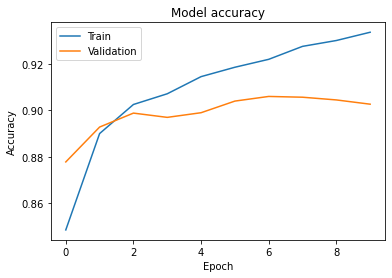

In [17]:
# visualize training and validation losses and accuracies

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

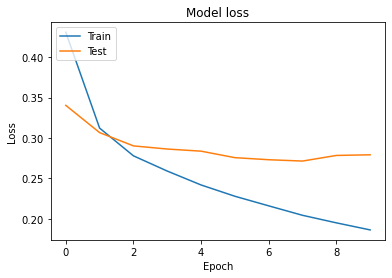

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [21]:
# On ajoute une couche Conv2D et une couche MaxPooling2D pour 
# améliorer le modèle

model5 = Sequential()
model5.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(10, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model5.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 37s 21ms/step - loss: 0.6342 - accuracy: 0.7723 - val_loss: 0.3574 - val_accuracy: 0.8710
Epoch 2/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.3193 - accuracy: 0.8859 - val_loss: 0.3037 - val_accuracy: 0.8922
Epoch 3/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2794 - accuracy: 0.9015 - val_loss: 0.2797 - val_accuracy: 0.8992
Epoch 4/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2517 - accuracy: 0.9109 - val_loss: 0.2575 - val_accuracy: 0.9063
Epoch 5/10
1688/1688 [==============================] - 38s 23ms/step - loss: 0.2286 - accuracy: 0.9183 - val_loss: 0.2471 - val_accuracy: 0.9110
Epoch 6/10
1688/1688 [==============================] - 38s 22ms/step - loss: 0.2054 - accuracy: 0.9273 - val_loss: 0.2596 - val_accuracy: 0.9052
Epoch 7/10
1688/1688 [==============================] - 36s 21ms/step - loss: 0.1941 - accuracy: 0.9285 - val_loss: 0.2412 -

In [23]:
_, test_acc = model5.evaluate(x_test, y_test)
print(test_acc)

# On a légèrement augmenté l'accuracy (d'environ 1%)

313/313 [==============================] - 2s 7ms/step - loss: 0.2750 - accuracy: 0.9055
0.9054999947547913


In [4]:
# On rajoute un FullyConnected au modèle

model6 = Sequential()
model6.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)))
model6.add(MaxPooling2D(pool_size=2))
model6.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)))
model6.add(MaxPooling2D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(150,activation='relu'))
model6.add(Dense(10, activation='softmax'))

model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model6.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 45s 26ms/step - loss: 0.5594 - accuracy: 0.7989 - val_loss: 0.3047 - val_accuracy: 0.8868
Epoch 2/10
1688/1688 [==============================] - 43s 25ms/step - loss: 0.2833 - accuracy: 0.8972 - val_loss: 0.2746 - val_accuracy: 0.9003
Epoch 3/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.2352 - accuracy: 0.9137 - val_loss: 0.2613 - val_accuracy: 0.9048
Epoch 4/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.2039 - accuracy: 0.9244 - val_loss: 0.2433 - val_accuracy: 0.9118
Epoch 5/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1726 - accuracy: 0.9366 - val_loss: 0.2508 - val_accuracy: 0.9140
Epoch 6/10
1688/1688 [==============================] - 41s 24ms/step - loss: 0.1486 - accuracy: 0.9450 - val_loss: 0.2368 - val_accuracy: 0.9185
Epoch 7/10
1688/1688 [==============================] - 41s 25ms/step - loss: 0.1216 - accuracy: 0.9547 - val_loss: 0.2451 -

In [26]:
_, test_acc = model6.evaluate(x_test, y_test)
print(test_acc)

# On a encore augmenté l'accuracy d'environ 1%

313/313 [==============================] - 2s 7ms/step - loss: 0.3196 - accuracy: 0.9131
0.913100004196167


In [4]:
# On rajoute un Dropout au modèle - vaut mieux le mettre après une 1ere
# conv2D
from tensorflow.keras.layers import Dropout

In [5]:
model7 = Sequential()
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)))
model7.add(MaxPooling2D(pool_size=2))
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1)))
model7.add(MaxPooling2D(pool_size=2))
model7.add(Dropout(0.25)) # mettre le pourcentage à éliminer
model7.add(Flatten())
model7.add(Dense(150,activation='relu')) # on met un nbre au pif
model7.add(Dense(10, activation='softmax'))

model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model7.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 45s 26ms/step - loss: 0.5752 - accuracy: 0.7961 - val_loss: 0.3194 - val_accuracy: 0.8798
Epoch 2/10
1688/1688 [==============================] - 41s 24ms/step - loss: 0.2992 - accuracy: 0.8902 - val_loss: 0.2570 - val_accuracy: 0.9050
Epoch 3/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.2569 - accuracy: 0.9062 - val_loss: 0.2448 - val_accuracy: 0.9098
Epoch 4/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.2176 - accuracy: 0.9177 - val_loss: 0.2374 - val_accuracy: 0.9132
Epoch 5/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.1898 - accuracy: 0.9300 - val_loss: 0.2281 - val_accuracy: 0.9147
Epoch 6/10
1688/1688 [==============================] - 41s 24ms/step - loss: 0.1747 - accuracy: 0.9339 - val_loss: 0.2449 - val_accuracy: 0.9117
Epoch 7/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.1569 - accuracy: 0.9403 - val_loss: 0.2322 -

In [10]:
_, test_acc = model7.evaluate(x_test, y_test)
print(test_acc)

# L'accuracy augmente de 0.07%, c'est pas ouf

313/313 [==============================] - 2s 8ms/step - loss: 0.2402 - accuracy: 0.9199
0.9199000000953674


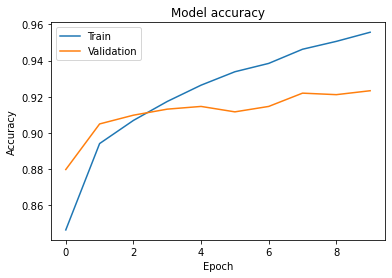

In [11]:
# visualize training and validation losses and accuracies

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

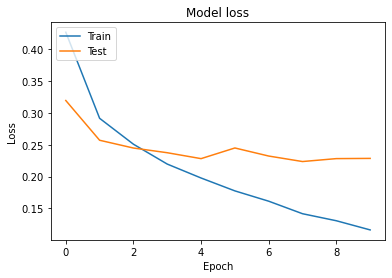

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()